In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2156,ham,Hey cutie. How goes it? Here in WALES its kind...,NaN,NaN,NaN
1255,ham,Just wait till end of march when el nino gets ...,NaN,NaN,NaN
415,ham,Whatsup there. Dont u want to sleep,NaN,NaN,NaN
497,ham,Some of them told accenture is not confirm. Is...,NaN,NaN,NaN
1230,ham,I want to send something that can sell fast. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvment
# 7. website

# 1. DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last three coloums
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1853,ham,I just made some payments so dont have that mu...
2030,ham,"Ugh y can't u just apologize, admit u were wro..."
4645,spam,We tried to contact you re your reply to our o...
658,ham,It doesnt make sense to take it there unless i...
2878,ham,U still painting ur wall?


In [9]:
#renamiing the colomn
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
1316,ham,Why nothing. Ok anyway give me treat
3585,spam,I am hot n horny and willing I live local to y...
292,ham,Oops. 4 got that bit.
981,ham,Reckon need to be in town by eightish to walk ...
769,ham,Lol I know! They're so dramatic. Schools alrea...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#cheak for duplicate values
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
#exploratory data analysis
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

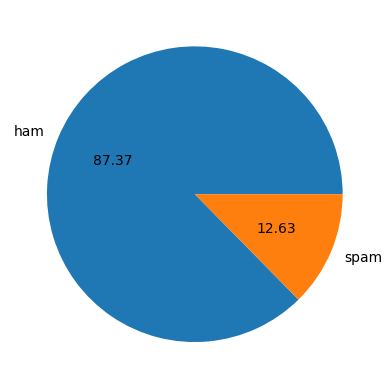

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced less spam and more ham


In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_characters'] =  df['text'].apply(len)  #column for char in message

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words used in per sms in new coloumn
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# lambda function applies a function to each SMS text (x) in that column.

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#no of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters', 'num_words', 'num_sentences']].describe()
# provides stasticale summary

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 0] [['num_characters', 'num_words', 'num_sentences']].describe() #ham messages describe

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 1] [['num_characters', 'num_words', 'num_sentences']].describe() #ham messages describe

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns
# more complex

<Axes: xlabel='num_characters', ylabel='Count'>

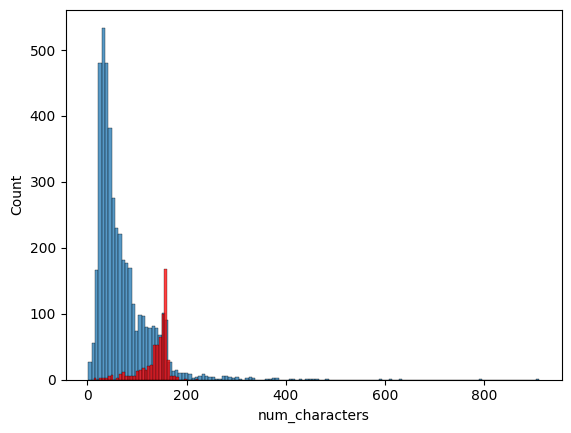

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
# num char in ham and spam histplot

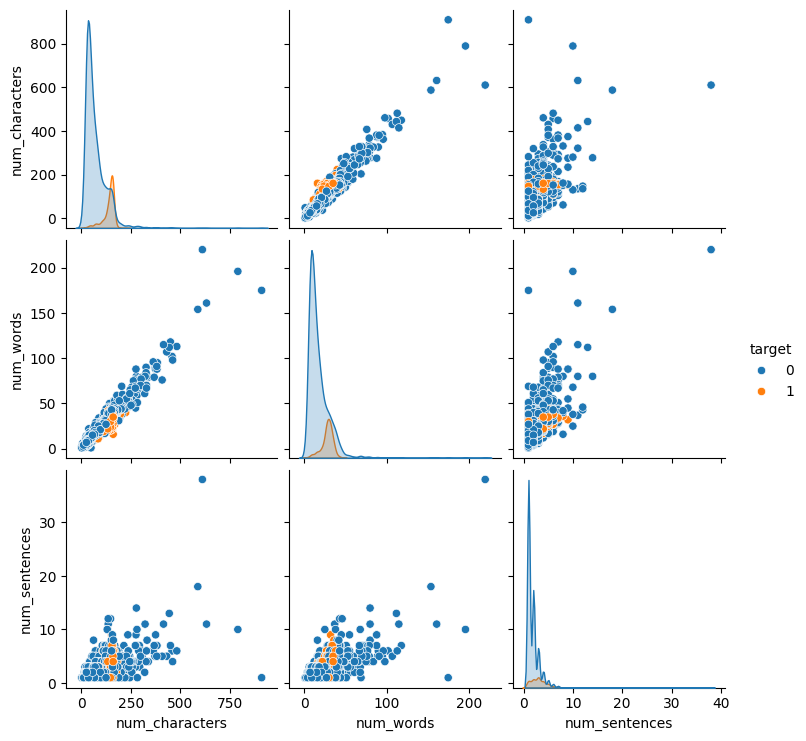

In [36]:
sns.pairplot(df, hue='target')
#  visualizing relationships between multiple variables

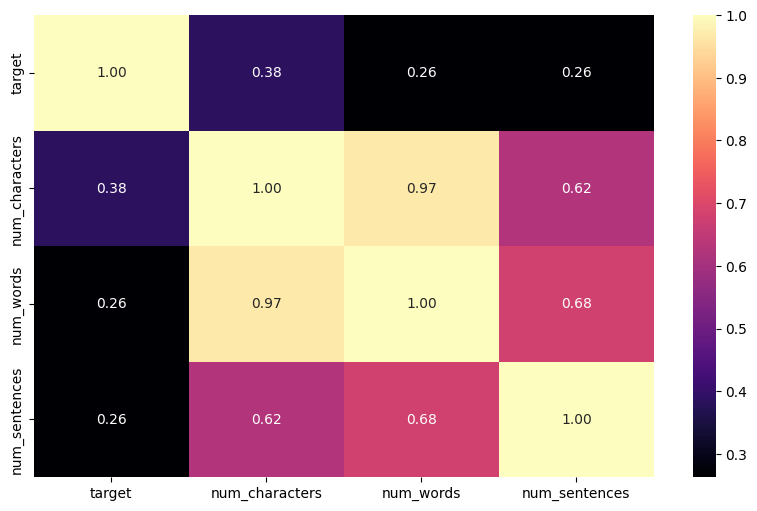

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (exclude text)
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")

# Show the plot
plt.show()

# correlation coefficients between multiple variables in a dataset
# correlation coefficient is a number that tells us how strongly two variables are related.

# 3. Data Preprocessing
Lower case,
Tokenization,
Removing special characters,
Removing stop words and punctuation,
stemming,

In [38]:
def transform_text(text):
    text = text.lower()       # lowecase
    text = nltk.word_tokenize(text)    #token breaks down a string of text 

    y = []
    for i in text:
        if i.isalnum():      # remove non alphabetic value
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:    #remove  stopwords like the , a , etc
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem import PorterStemmer
# Define ps (Porter Stemmer)
ps = PorterStemmer()
transform_text('Do you think I study hard')

'think studi hard'

In [42]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [43]:
# ps = nltk.PorterStemmer()) to reduce each word to its base or root form 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [44]:
transform_text('I loved my field of work. What about you?')

'love field work'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
!pip install wordcloud

In [48]:
from wordcloud import WordCloud  
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')

# A word cloud is a visual representation of word frequency

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

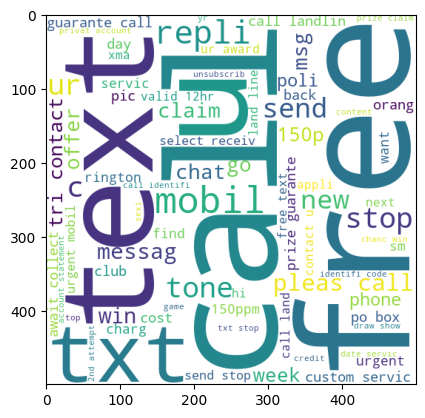

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

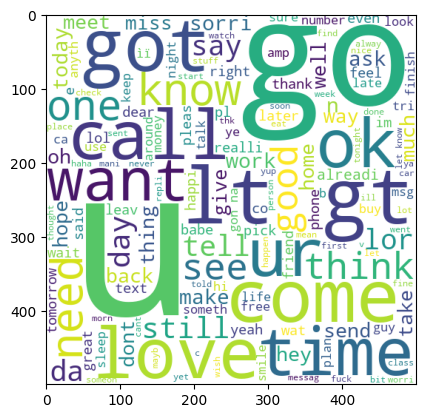

In [52]:
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

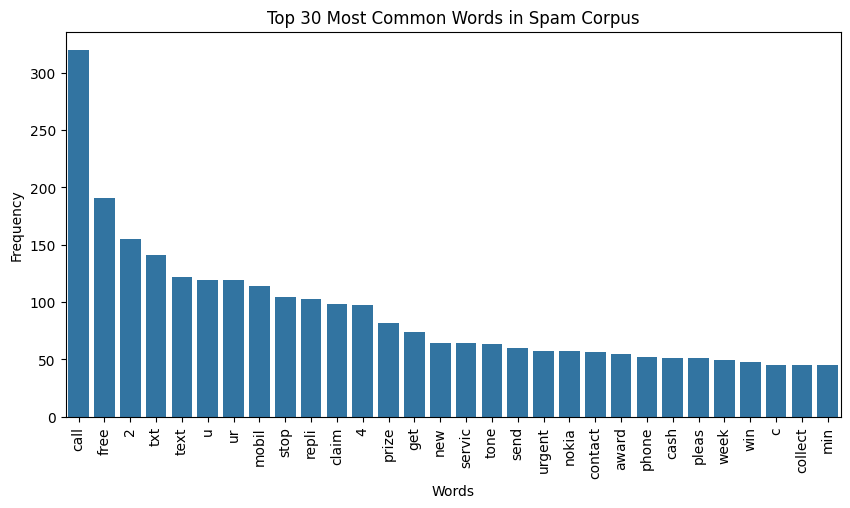

In [56]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Frequency"])

# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x=common_words["Word"], y=common_words["Frequency"])
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

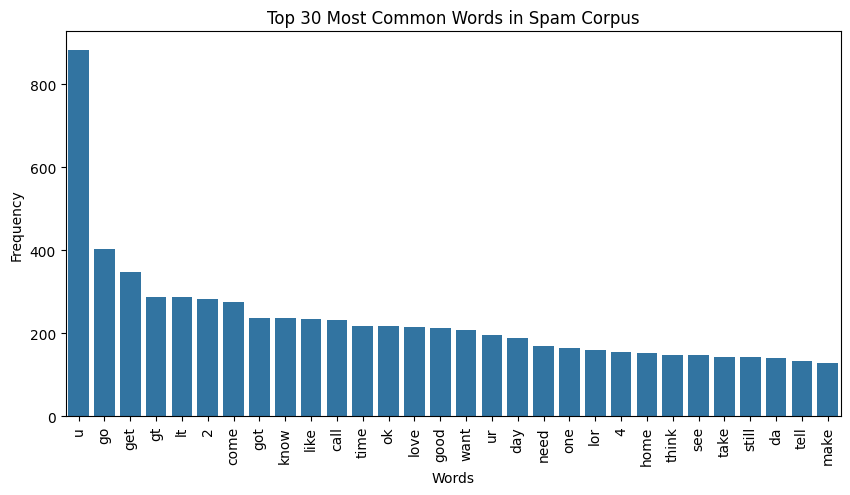

In [59]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Frequency"])

# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x=common_words["Word"], y=common_words["Frequency"])
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [60]:
# we have done with EDA
# what will we do next MODEL BUILDING
# i.e. Na`ive Bayes generally their is concesses that Naive bayes is good for texual data

# 4. MODEL BUILDING

In [61]:
#ML algo needs numerical inputs
# our input is in text form
# output is in numerical form like 
# have to conver text into number(vector) vectorizaton(2types bag of words, tfidf, word to weg)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [65]:
#appending the num_character column to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [66]:
X.shape

(5169, 3000)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from  sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
# tfdif --> MNB

In [77]:
pip install --default-timeout=100 xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [80]:
clfs = {              #its a dictionary contains key algo name and value
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc
}  

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [82]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [83]:
accuracy_scores = []  
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("for", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    accuracy_scores.append(current_accuracy)  # Append accuracy
    precision_scores.append(current_precision)  # Append precision

for SVC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
for KN
Accuracy: 0.9052224371373307
Precision: 1.0
for NB
Accuracy: 0.9709864603481625
Precision: 1.0
for DT
Accuracy: 0.9274661508704062
Precision: 0.8118811881188119


In [84]:
# Now create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  
    'Accuracy': accuracy_scores,
    'Precision': precision_scores  
})

print(performance_df)

  Algorithm  Accuracy  Precision
0       SVC  0.975822   0.974790
1        KN  0.905222   1.000000
2        NB  0.970986   1.000000
3        DT  0.927466   0.811881


In [85]:
#voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb', mnb), ('et', etc)], voting='soft')

In [87]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [89]:
# apply stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Accuracy", precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Accuracy 0.9465648854961832


# Model improvement

In [93]:
# 1. change the max_features parameter of tfidf initially it was low acuracy and precision
# 2. NB accuracy: 0.97 pricision: 1.0
# scalling but it does not give good precision so we did not use scalling
# no, of char, no. of words, 
# so after so many models applying on data and cheaking accuracy and precision i am descidinf Multinomial Naive Bayes model.
# now we will create a pipeline and will covert that pipeline into a website
# new sms comes --> 3steps --> 1. preprocess with the function i.e. transform_text() what the funtion do like limitization, removing stopwords, coverting to lowercase, all transformation apply it on new sms.
# --> 2. Vectorize --> 3. Algorithm Apply

In [97]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

import pickle
# Save the trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(mnb, model_file)

# Save the vectorizer used for transforming text data
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)

print("✅ model.pkl and vectorizer.pkl saved successfully!")


✅ model.pkl and vectorizer.pkl saved successfully!


In [101]:
import pickle
from sklearn.exceptions import NotFittedError

# Load vectorizer
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

try:
    # Try transforming a dummy message
    vectorizer.transform(["hello"])
    print("✅ TF-IDF Vectorizer is fitted.")
except NotFittedError:
    print("❌ TF-IDF Vectorizer is NOT fitted.")


✅ TF-IDF Vectorizer is fitted.


In [103]:
import numpy as np
try:
    dummy_input = np.zeros((1, model.n_features_in_))
    model.predict(dummy_input)
    print("✅ Model is fitted.")
except Exception as e:
    print("❌ Error:", e)


✅ Model is fitted.
